<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1 :  Become familiar with the dataset

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [10]:
boston_df.shape

(506, 14)

In [11]:
boston_df.describe

<bound method NDFrame.describe of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

     

In [13]:
# Remove the "Unnamed" column from the DataFrame
boston_df.drop(columns=['Unnamed: 0'], inplace=True) 
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 2: Generate Descriptive Statistics and Visualizations

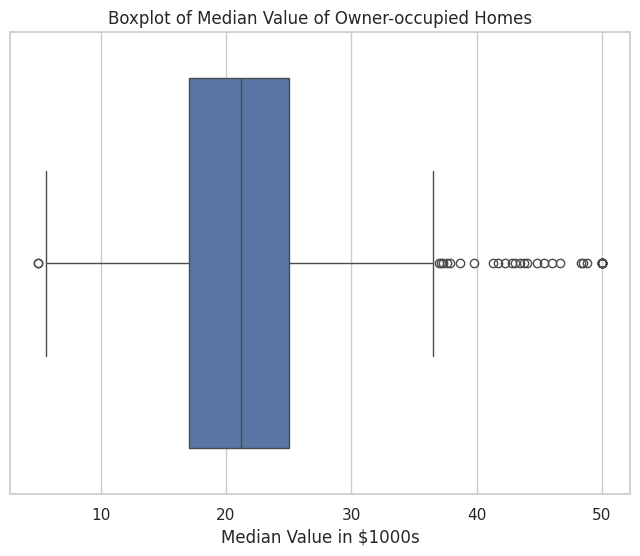

In [19]:
sns.set(style="whitegrid")
pyplot.figure(figsize=(8, 6))  
sns.boxplot(x='MEDV', data=boston_df)  

pyplot.title('Boxplot of Median Value of Owner-occupied Homes')
pyplot.xlabel('Median Value in $1000s')

pyplot.show()

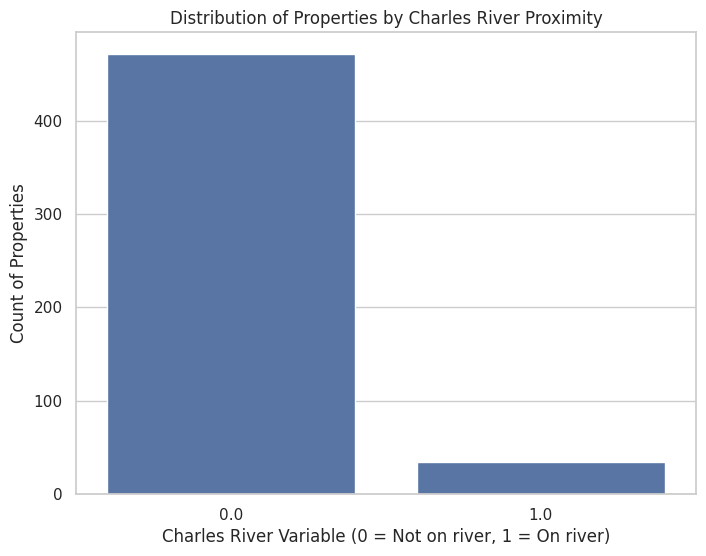

In [22]:
pyplot.figure(figsize=(8, 6)) 
sns.countplot(x='CHAS', data=boston_df)

pyplot.title('Distribution of Properties by Charles River Proximity')
pyplot.xlabel('Charles River Variable (0 = Not on river, 1 = On river)')
pyplot.ylabel('Count of Properties')

pyplot.show()

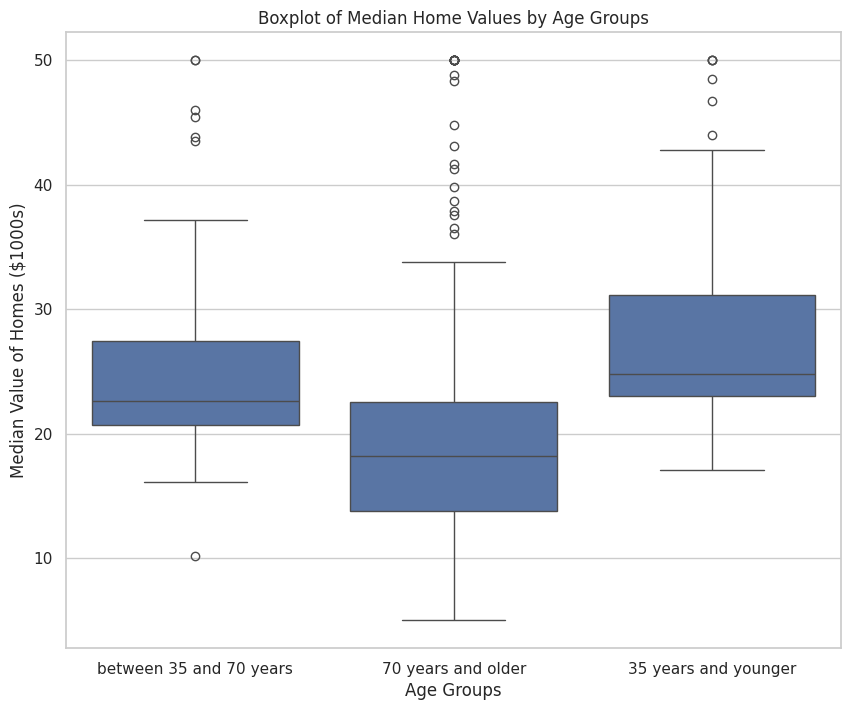

In [43]:
# Discretizing the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older
boston_df.loc[boston_df['AGE'] <= 35, 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[boston_df['AGE'] > 70, 'age_group'] = '70 years and older'

pyplot.figure(figsize=(10, 8)) 
sns.boxplot(x='age_group', y='MEDV', data=boston_df)

pyplot.title('Boxplot of Median Home Values by Age Groups')
pyplot.xlabel('Age Groups')
pyplot.ylabel('Median Value of Homes ($1000s)')

pyplot.show()

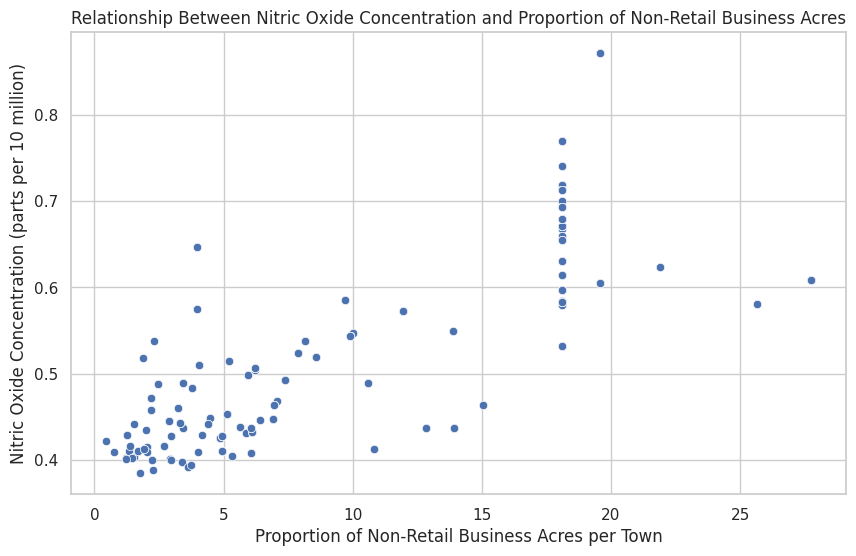

In [29]:
pyplot.figure(figsize=(10, 6))  
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)

pyplot.title('Relationship Between Nitric Oxide Concentration and Proportion of Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town')
pyplot.ylabel('Nitric Oxide Concentration (parts per 10 million)')

pyplot.show()

##### From the scatter plot we can say that there is a positive correlation between the proportion of non-retail business acres per town (INDUS) and nitric oxide concentrations (NOX).

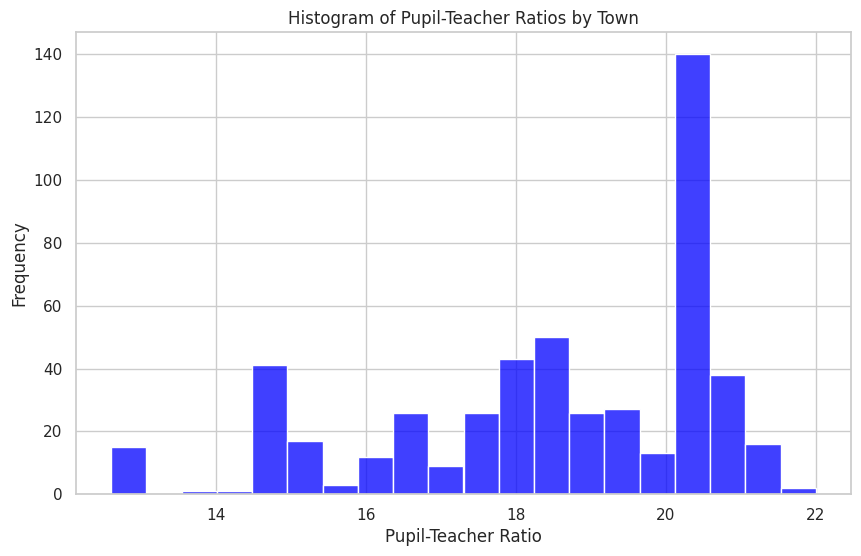

In [31]:
pyplot.figure(figsize=(10, 6)) 
sns.histplot(boston_df['PTRATIO'], kde=False, color='blue', bins=20)

pyplot.title('Histogram of Pupil-Teacher Ratios by Town')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')

pyplot.show()

# Task 3: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? 

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no significant difference in median value of houses bounded by the Charles river and those that are not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is significant difference in median value of houses bounded by the Charles river and those that are not")

In [40]:
# verify if the variances are equal or not
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

# since the p-value is less than 0.05 we can assume inequality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [41]:
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']  
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV'] 

t_stat, p_value = scipy.stats.ttest_ind(group1, group2, equal_var=False) 

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 3.113291312794837
P-value: 0.003567170098137517


**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a significant difference in median value of houses bounded by the Charles river and those that are not


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

We will use the "age_group" column for this task since the one-way ANOVA can't work with continuous variable, reminder the "age_group" categories:

*   35 years and younger
*   between 35 and 70 years
*   70 years and older

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

Test for equality of variance


In [52]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# since the p-value is greater than 0.05, the variances are equal

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

First, separate the three samples (one for each job category) into a variable each.

In [50]:
thirtyfive_younger = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

Now, run a one-way ANOVA.

In [51]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_younger, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

State the hypothesis:

*   $H\_0:$ There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H\_1:$ there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot


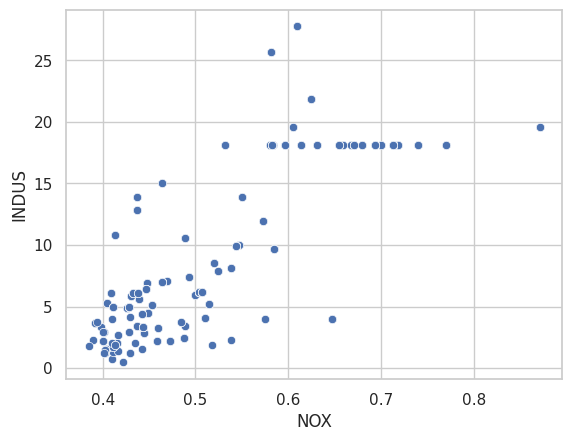

In [54]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [55]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value is less than 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 

State the hypothesis:

*   $H\_0:$ There is no relationship between the weighted distance to the five Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV).
*   $H\_1:$ There is a relationship between the weighted distance to the five Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV).

In [56]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.21e-08
Time:                        11:15:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p_value is less than 0.05 we can reject the null hypothesis and deduce that there is a relationship between the weighted distance to the five Boston employment centres and the median value of owner occupied home, and we can also see that for each additional weighted distance to the five Boston employment centres the median value of owner occupied home increases by 1.0916.